# rNet OceanDAO: increase DAO Health by adding dynamics to Grants system

## Research Topic/Question
- a. How can we make DAOs well functioning organisations?
    - i. Increasing DAO member (stakeholder) engagement
    - ii. Increase contributors by making Grants CAP predictable
    - iii. Balance Treasury 
- b. Can we derive assumptions of what might increase DAO's health?
    - i. Under what conditions will stakeholder participation grow?
    - ii. Under what conditions is ?

## Test agents

Stakeholders of DAOs are:
- Investors (Stakers)
- DAO Protocol initiators (Ambassadors)
- DAO Consumers
- DAO Producers
- DAO Intermediairies (Market Makers)
- Producer Aggregators (Unions)
- Proposal Applicants (Grantees)

## Policies and mechanisms (Ocean DAO)
- Investors
    - Stake on high performance datasets
    - Want to know what datasets are (going to be) valuable
    - Provide liquidity for an ROI
    - Unstake on poor performing datasets

- Ambassadors
    - Want to grow the ecosystem
    - Help newcomers onboard
    - Perform parameter adjustments for funding projects
    - Guide grantees in project proposals

- Consumers
    - Want good datasets for a fair price
    - Look for bargains
    - Want to be guided to curated datasets

- Producers
    - Want a fair price for their data
    - Will bargain for liquidity
    - Want to know what the market is looking for

- Market Makers
    - Want to promote datasets for market needs
    - Incentivise producers to provide by delivering needs
    - Incentivise consumers to buy by delivring curated lists of datasets

- Unions
    - Aggregate individual datasets in order to have more chance of being recognized as valuable
    - Make use of Market Makers curated lists

- Grantees ()
    - Want to earn rewards for growing the ecosystem
    - Want to know the best way for success using the rules of the DAO (Game theory)
   

### Assumptions



## Model File Structure


In [1]:
%pip install radcad
%pip install matplotlib
%pip install enforce_typing
%pip install names
%pip install networkx
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
from model.state_variables_model1 import genesis_state
from model.partial_state_update_block_model1 import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params_model1 import params

running file: sim_setup.py
SIMULATION_TIME_STEPS:  360
MONTE_CARLO_RUNS:  4
end of file: sim_setup.py


In [3]:
model = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block, params=params)

simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)

simulations = [simulation]
experiment = Experiment(simulations)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

## Interpretation of Results

In [4]:
df = pd.DataFrame(result)
# rdf = df[df['substep'] == df.substep.max()]
df1 = df[(df["round"] == 1)]

df1.reset_index(inplace=True)
df


,dao_members,voters,stakers,builders,market_makers,grant_cap,projects,unsound_projects,datasets,community_projects,new_entrants,round,simulation,subset,run,substep,timestep
0,200,50,50,50,10,200,18,0,0,0,0,1,0,0,1,0,0
1,200,50,50,50,10,200,18,4,5,4,3,1,0,0,1,2,1
2,200,50,52,47,10,200,18,3,5,4,3,1,0,0,1,2,2
3,200,52,57,47,10,200,18,4,5,4,3,1,0,0,1,2,3
4,200,52,60,44,10,200,18,3,5,5,5,1,0,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1345889,3564889,16953784888844,0,0,449,20,5,5,4,4,12,0,0,4,2,356
1440,1345889,3446059,16953784888844,0,0,449,20,4,5,4,4,12,0,0,4,2,357
1441,1345889,3503493,17801474133286,0,0,449,20,5,5,4,4,12,0,0,4,2,358
1442,1345889,3386709,17801474133286,0,0,449,20,4,6,5,3,12,0,0,4,2,359


Text(0.5, 1.0, 'Stakers')

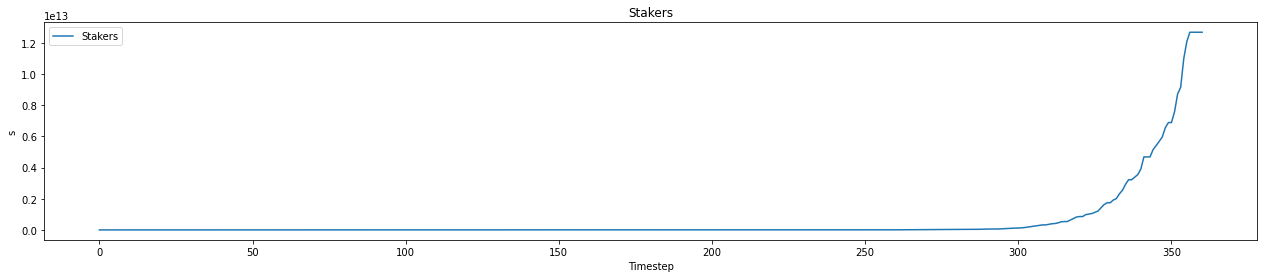

In [5]:
import matplotlib.pyplot as plt

df1 = df[(df['run'] == 1)]
plt.figure(figsize=(100,4))
plt.subplot(141)
plt.plot(df1['timestep'], df1["stakers"],label='Stakers')
plt.xlabel('Timestep')
plt.ylabel('s')
plt.legend()
plt.title('Stakers')

In [6]:
df1 = df[(df['run'] == 1) & (df['simulation'] == 0)]
df2 = df[(df['run'] == 2) & (df['simulation'] == 0)]
df3 = df[(df['run'] == 3) & (df['simulation'] == 0)]
df4 = df[(df['run'] == 4) & (df['simulation'] == 0)]

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)

dfs1 = [df1,df2,df3,df4]
df3.head()

,dao_members,voters,stakers,builders,market_makers,grant_cap,projects,unsound_projects,datasets,community_projects,new_entrants,round,simulation,subset,run,substep,timestep
0,200,50,50,50,10,200,18,0,0,0,0,1,0,0,3,0,0
1,200,50,50,50,10,200,18,4,6,4,3,1,0,0,3,2,1
2,200,50,55,47,10,200,18,3,5,4,3,1,0,0,3,2,2
3,200,52,61,47,10,200,18,4,4,3,4,1,0,0,3,2,3
4,200,51,61,47,9,200,18,5,5,4,4,1,0,0,3,2,4


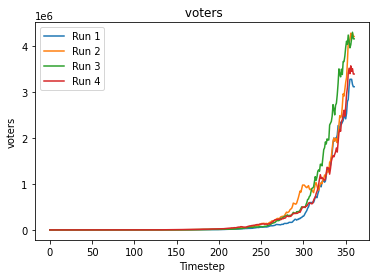

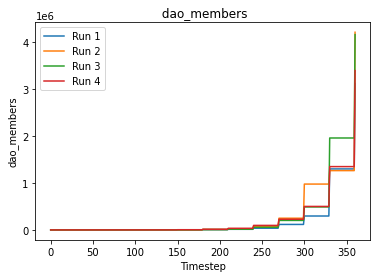

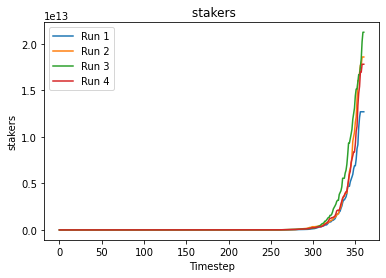

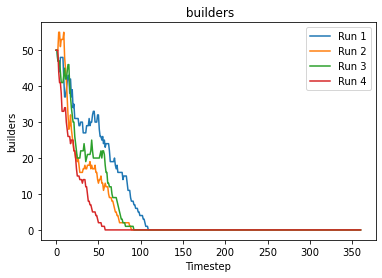

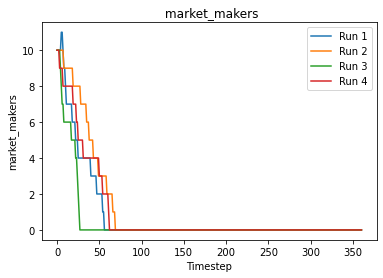

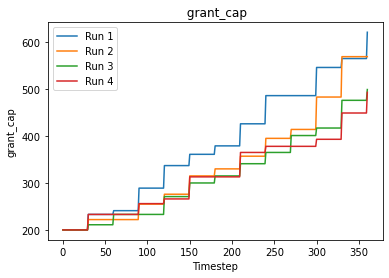

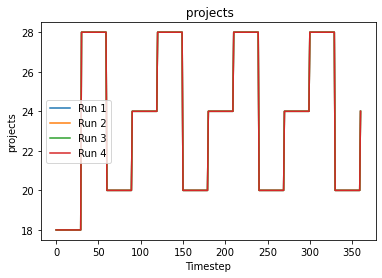

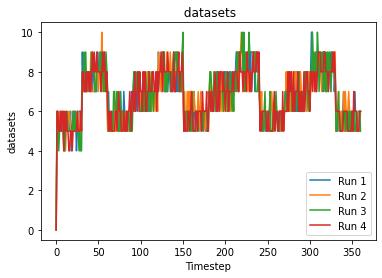

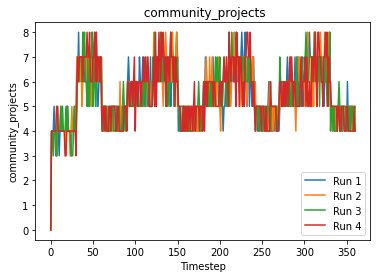

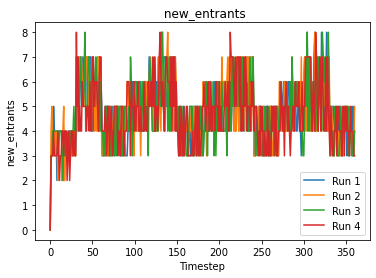

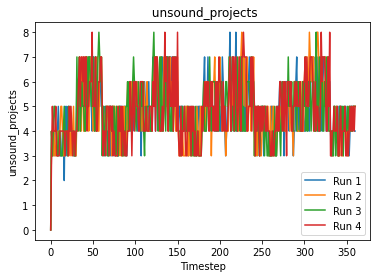

In [7]:
from model.plot_utils import monte_carlo_plot

monte_carlo_plot(dfs1, 'voters')
monte_carlo_plot(dfs1, 'dao_members')
monte_carlo_plot(dfs1, 'stakers')
monte_carlo_plot(dfs1, 'builders')
monte_carlo_plot(dfs1, 'market_makers')

monte_carlo_plot(dfs1, 'grant_cap')
monte_carlo_plot(dfs1, 'projects')
monte_carlo_plot(dfs1, 'datasets')
monte_carlo_plot(dfs1, 'community_projects')
monte_carlo_plot(dfs1, 'new_entrants')
monte_carlo_plot(dfs1, 'unsound_projects')
